<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Типы данных</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Адекватность-данных-и-выбросы" data-toc-modified-id="Адекватность-данных-и-выбросы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Адекватность данных и выбросы</a></span></li><li><span><a href="#Ресемплирование-данных" data-toc-modified-id="Ресемплирование-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Ресемплирование данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Выделение-обучающей-и-тестовой-выборок" data-toc-modified-id="Выделение-обучающей-и-тестовой-выборок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выделение обучающей и тестовой выборок</a></span></li><li><span><a href="#Добавление-признаков-для-обучения-моделей" data-toc-modified-id="Добавление-признаков-для-обучения-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Добавление признаков для обучения моделей</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Тестирование-на-тестовых-данных" data-toc-modified-id="Тестирование-на-тестовых-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование на тестовых данных</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

**Цель проекта**

Подготовить прототип модели машинного обучения для компании «Чётенькое такси», оператора пассажирских перевозок. Модель должна  прогнозировать количество заказов такси на следующий час, чтобы оператор мог привлекать больше водителей в период пиковой нагрузки. 

При определении оптимальной модели должен быть учтен важный для заказчика параметр:
качество предсказания, оцененное метрикой RMSE, должно быть максимально высоким (RMSE <= 48)

**Данные для анализа**

На анализ переданы исторические данные о заказах такси в аэропортах.

**Шаги (план) проекта**

1.  Подготовка данных
2.  Анализ данных
3.  Обучение моделей
4.  Тестирование на тестовых данных
5.  Итоговый вывод

## Подготовка данных

Импортируем необходимые библиотеки для работы с данными в текущем проекте.

In [1]:
# импорт библиотек
import numpy as np
import pandas as pd

# построение диаграмм
import matplotlib.pyplot as plt

# анализ временных рядов
from statsmodels.tsa.seasonal import seasonal_decompose

# машинное обучение
import lightgbm as ltb
from numpy.random import RandomState
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split

# оценка качества модели
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

# отключение предупреждений
import warnings
warnings.filterwarnings("ignore")

### Загрузка и изучение данных

Откроем датасет с данными и изучим его.

In [2]:
# открытие файла с применением конструкции try/except для исключения проблем с отработкой кода при подготовке проекта локально
try:
    df = pd.read_csv('/datasets/taxi.csv')
except FileNotFoundError:
    df = pd.read_csv('C:/Users/User/Desktop/Обучение/taxi.csv')
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


Изучим общую информацию о данных.

In [3]:
# получение общей информации о структуре датафрейма
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


1. В датасете содержится 26496 строк, 2 столбца.
2. Колонки названы в соответствии с правилами нотации Python (латиница, нижний регистр, змеиный стиль), переименование не требуется.
3. В колонке num_orders требуется изменение типа данных int64 на int32 для экономии памяти, в колонке datetime требуется изменение типа данных с object на datetime.
4. Пропущенных значений нет, обработка пропусков не требуется.
5. Требуется проверка данных на наличие явных дубликатов.
6. Требуется проверка данных на адекватность и выбросы и обработка выбросов при их наличии.

### Типы данных

Изменим тип данных в колонке num_orders с int64 на int32 для экономии памяти.

In [4]:
# изменение типов данных
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)

Изменим тип данных в колонке datetime с object на datetime.

In [5]:
# изменение типа данных в колонках date_crawled, date_created и last_seen на datetime
df['datetime'] = pd.to_datetime(df['datetime']) 

Проверим результат.

In [6]:
# получение общей информации о структуре датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 310.6 KB


Изменение типов данных произведено корректно.

### Дубликаты

Проверим датафрейм на наличие явных дубликатов.

In [7]:
# проверка наличия явных дубликатов
df.duplicated().sum()

0

Дубликатов нет, удаление не требуется.

### Адекватность данных и выбросы

Проверим данные на адекватность и выбросы.

**datetime**

Установим дату в качестве индекса и проверим, в хронологическом ли порядке расположены значения.

In [8]:
# установка значений колонки datetime в качестве индексов
df = df.set_index('datetime')

In [9]:
# проверка хронологического порядка в индексах
df.index.is_monotonic

True

Значения расположены в хронологическом порядке. Посмотрим, за какой период приведены данные в выборке.

In [10]:
# вывод минимального значения индекса
df.index.min()

Timestamp('2018-03-01 00:00:00')

In [11]:
# вывод максимлаьного значения индекса
df.index.max()

Timestamp('2018-08-31 23:50:00')

Данные в выборке приведены за полгода - период 01.03.2018 - 31.08.2018

**num_orders**

In [12]:
# вывод статистики по значениям колонки
df['num_orders'].describe().round(2)

count    26496.00
mean        14.07
std          9.21
min          0.00
25%          8.00
50%         13.00
75%         19.00
max        119.00
Name: num_orders, dtype: float64

Данные по 10-тиминутным интервалам адекватные, оставим их без изменения.

### Ресемплирование данных

Проведем ресемплирование данных по одному часу, просуммировав значения 10-тиминутных интервалов в рамках каждого часа.

In [13]:
# ресемплирование данных
df = df.resample('1H').sum()

Оценим результат.

In [14]:
# вывод первых пяти строк датасета
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [15]:
# получение общей информации о структуре датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int32
dtypes: int32(1)
memory usage: 51.8 KB


Ресемплирование по максимальному значению в час выполнено корректно.

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод** 

В ходе обработки выборки на данном этапе проделаны следующие работы:

1. Загружена и изучена выборка с данными: исходный датасет содержит 26496 строк, 2 столбца.
2. Проведена предобработка данных:
 * заменены типы данных int64 на int32 и object на datetime,
 * проведена проверка на дубликаты, 
 * проведена проверка данных на адекватность.
    
Дубликатов, пропусков и выбросов в данных нет.

3. Установлена в качестве индекса колонка с датой, проверен хронологический порядок индексов.
4. Проведено ресемплирование данных: данные сгруппированы по одному часу суммированием 10-тиминутных интервалов. 

Итоговая выборка для дальшейшей работы содержит 4416 строк, 1 столбец; данные приведены за 6 месяцев с 01.03.2018 по 31.08.2018.
   
<div>

## Анализ данных

Построим график временного ряда за весь период.

<AxesSubplot:xlabel='datetime'>

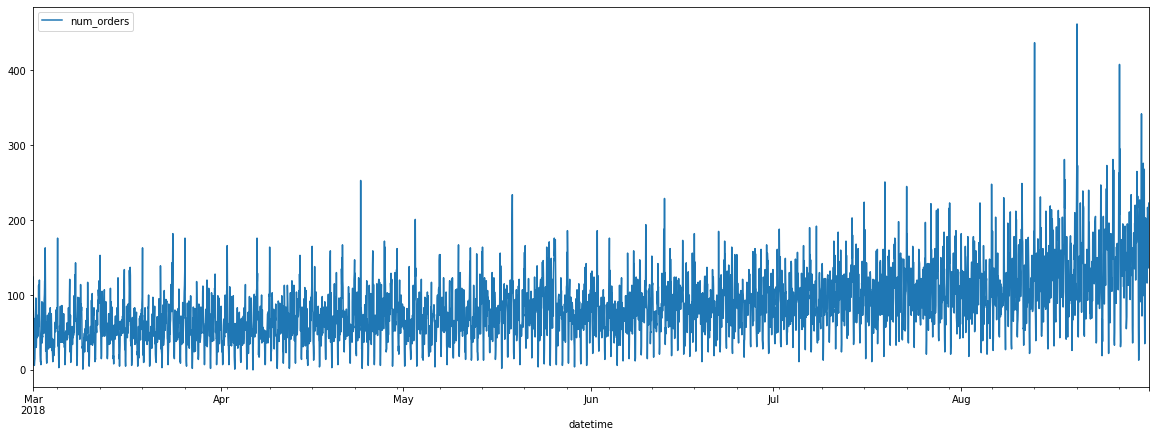

In [16]:
# построение графика
df.plot(figsize=(20, 7))

В рамках приведенного в выборке периода наблюдается рост числа заказов на отрезке с июня по август по сравнению с периодом март-июнь.

In [17]:
# ресемплирование данных по 1 дню
df_1d = df.resample('1d').sum()

<AxesSubplot:xlabel='datetime'>

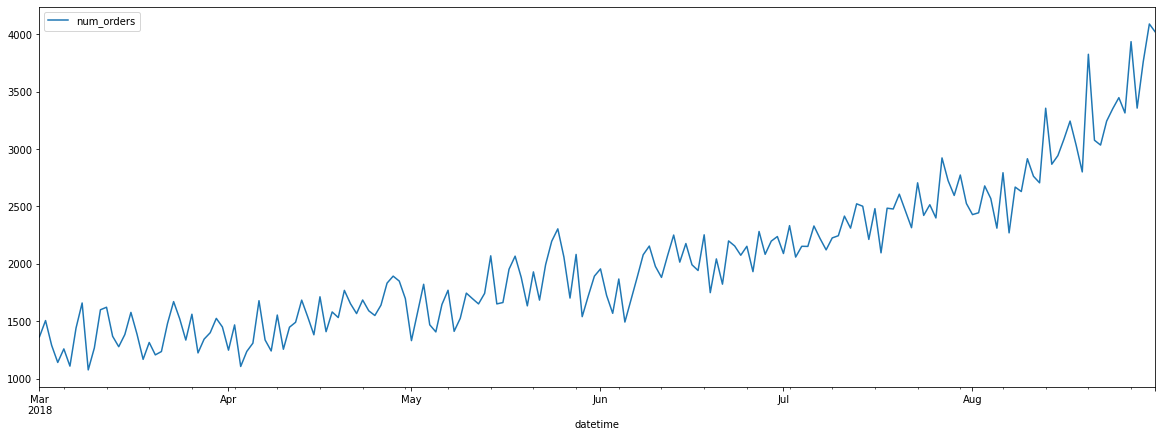

In [18]:
# построение графика по данным по 1 дня
df_1d.plot(figsize=(20, 7))

Проанализируем тенденции почасовой загрузки в рамках 15 дней.

<AxesSubplot:xlabel='datetime'>

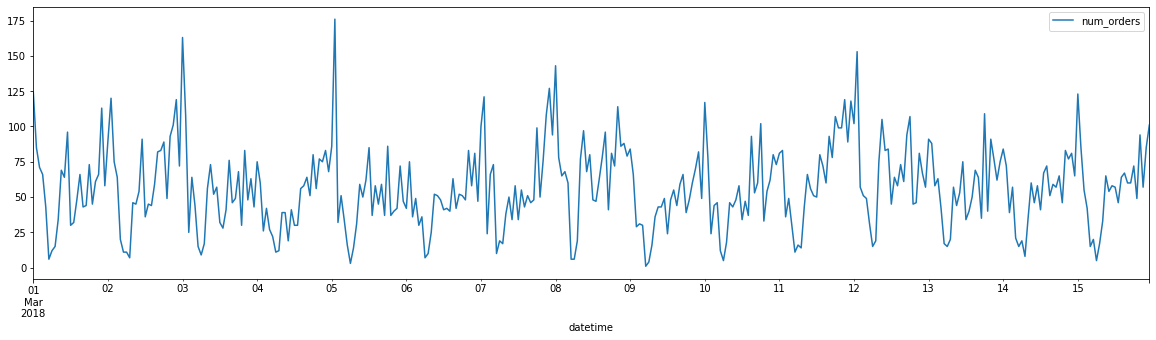

In [19]:
# построение графика по временному ряду за 15 дней марта
df_days = df['2018-03-01':'2018-03-15']
df_days.plot(figsize=(20, 5))

В рамках выбранного периода видно, что пик заказов приходится, как правило, на вечерние и ночные часы (диапазон 20-01), в утренние часы, наоборот, наблюдается снижение активности клиентов (до 7-8 утра).

Применим **скользящее среднее** для снижения колебаний в выбранном диапазоне данных и оценки тенденций.

<AxesSubplot:xlabel='datetime'>

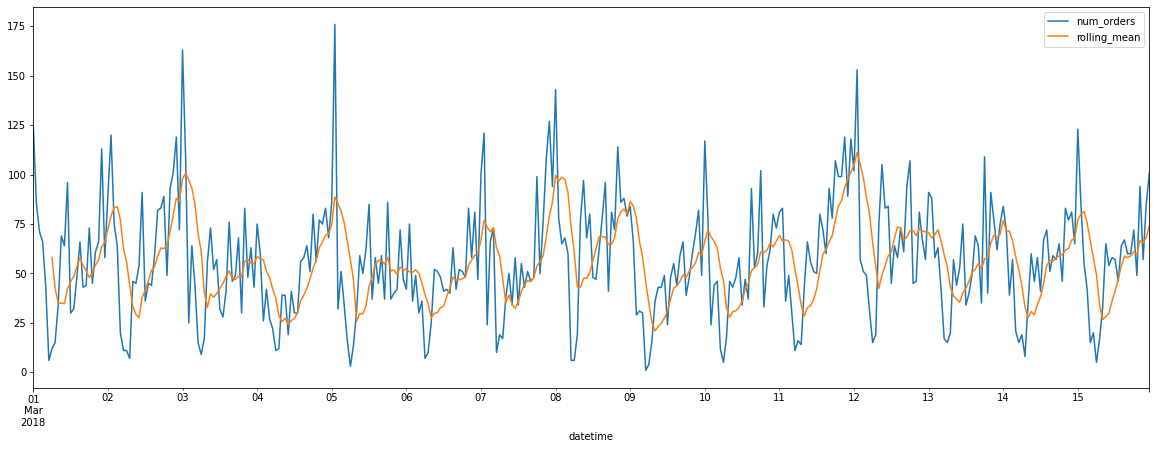

In [20]:
# построение графика со скользящим средним
df_days['rolling_mean'] = df_days.rolling(7).mean() 
df_days.plot(figsize=(20, 7))

Описанная выше тенденция с количеством заказов по часам подтверждается.

Проанализируем выборку при помощи структуры **DecomposeResult**.

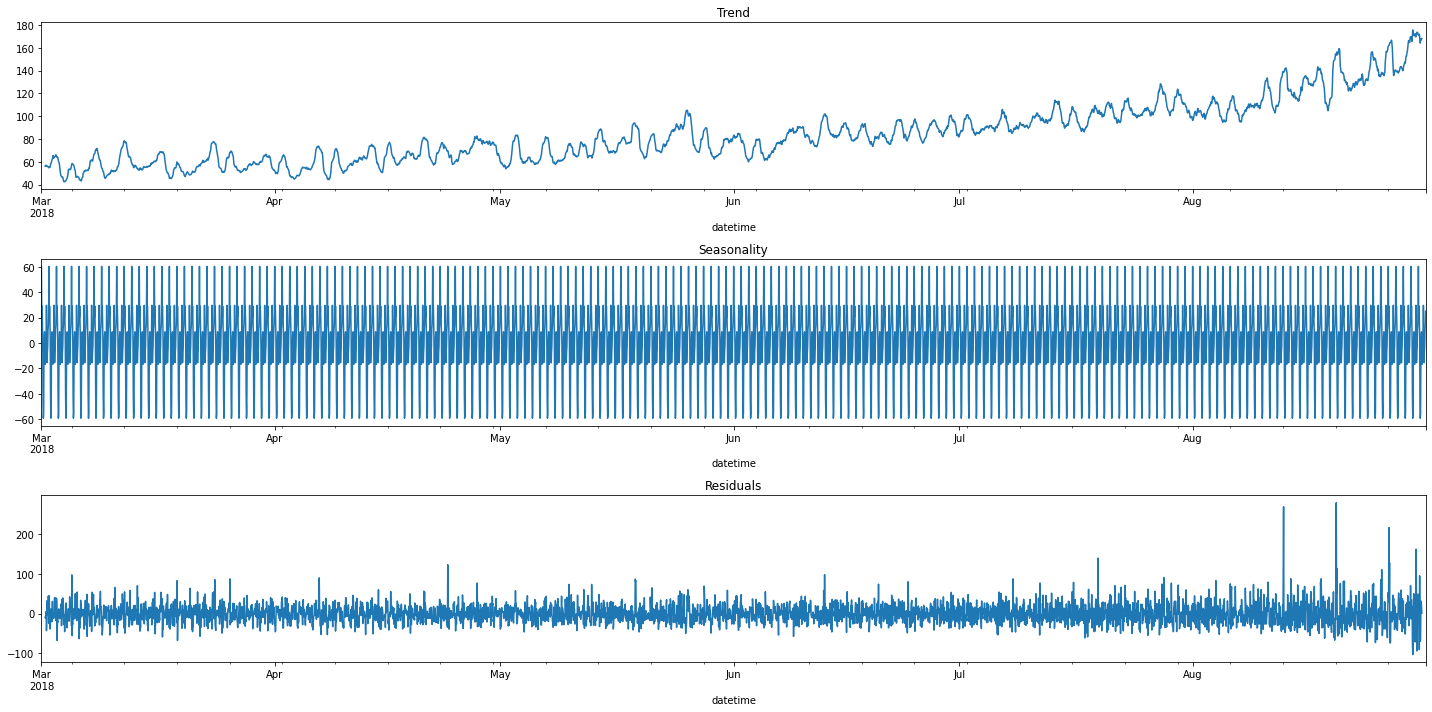

In [21]:
# деление данных на три составляющие: тренд, сезонность и остаток и построение графиков по ним
decomposed = seasonal_decompose(df)

plt.figure(figsize=(20, 10))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Графики подтверждают наличие тренда на рост заказов, начиная с июня; сезонность отсутствует; шум также более значительно выражен в конце периода (июль-август).

Вычислим **разности временного ряда**, чтобы преобразовать наш временной рад в стационарный.

<AxesSubplot:xlabel='datetime'>

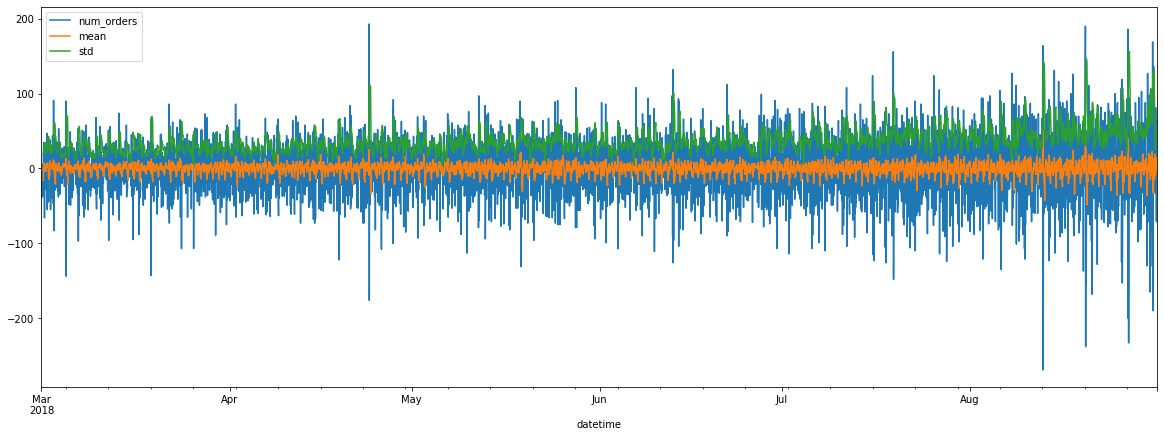

In [22]:
# вычисление разности временного ряда
df_diff = df - df.shift()
df_diff['mean'] = df_diff['num_orders'].rolling(7).mean()
df_diff['std'] = df_diff['num_orders'].rolling(7).std()
df_diff.plot(figsize=(20, 7))

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод** 

В рамках работ на 2 шаге проделаны следующие операции:

1. Построены графики по данным выборки за весь период и за 15 дней марта для анализа тенденций.

    Определены тенденции на рост числа заказов с июня по август в рамках всей выборки, а также на рост числа заказов в вечерние и ночные часы с 20 до 01 часа в рамках дня.
 
    
2. С помощью скользящего среднего снижены колебания и подтверждены выводы о тенденциях, сделанные выше.
3. Применена структура DecomposeResult, подтвердившая тренд на рост числа заказов с июня по август и отсутствие сезонности.
4. Вычислены и перенесены на график разности временного ряда для преобразования временного ряда в стационарный.
   
<div>

## Обучение моделей

### Выделение обучающей и тестовой выборок

Перед началом обучения определим качество прогноза с помощью метрики RMSE на константной модели.

In [23]:
# создание обучающей и тестовой выборок
train, test = train_test_split(df, shuffle=False, test_size=0.1)

Оценим их размеры.

In [24]:
# вывод размера выборки
train.shape

(3974, 1)

In [25]:
# вывод размера выборки
test.shape

(442, 1)

Выборки выделены корректно.

Предскажем значения тестовой выборки константой - медианой обучающего набора данных, и оценим метрику RMSE.

In [26]:
# предсказание 
pred_median = np.ones(test.shape) * (train['num_orders'].median())
print("RMSE константной модели на тестовой выборке:", mean_squared_error(test, pred_median, squared=False))

RMSE константной модели на тестовой выборке: 87.15277582981295


### Добавление признаков для обучения моделей

Добавим в датасет признаки для обучения моделей и предсказания.

Создадим функцию для добавления признаков в датасет (календарных, "отстающих значений", скользящего среднего).

In [27]:
# создание функции
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

Проверим работу функции.

In [28]:
# проверка работы функции и вывод результата
make_features(df, 15, 10)
df.head()

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Функция работает корректно.

### Обучение моделей

Разделим дополненный признаками датасет на обучающую и тестовую выборки с признаками и целевым признаком, удалим пропуски из обучающих данных.

In [29]:
# разделение датасета на выборки
train, test = train_test_split(df, shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop('num_orders', axis=1)
target_train = train[['num_orders']]
features_test = test.drop('num_orders', axis=1)
target_test = test[['num_orders']]

Проверим корректность разделения по размерам выборок.

In [30]:
features_train.shape

(3959, 18)

In [31]:
target_train.shape

(3959, 1)

In [32]:
features_test.shape

(442, 18)

In [33]:
target_test.shape

(442, 1)

Разделение на выборки прошло корректно.

Проведем обучение моделей на обучающей выборке и оценим время обучения и скорость предсказания, а также качество предсказания с помощью метрики RMSE для моделей:
1. Линейной регрессии
2. Случайного леса
3. LGBM

**Линейная регрессия**

Создадим модель линейной регрессии и оценим на данных обучающей выборки ее качество на базе метрики RMSE.

In [34]:
# создание модели
model_lr = LinearRegression()

In [35]:
# обучение, предсказание и оценка качества на обучающих данных
model_lr.fit(features_train, target_train)
target_pred_lr = model_lr.predict(features_train)
result_lr = mean_squared_error(target_train, target_pred_lr, squared=False)
print("RMSE линейной регрессии на обучающей выборке:", result_lr)

RMSE линейной регрессии на обучающей выборке: 30.642950436097532


**Случайный лес**

Создадим модель Случайного леса и оценим на данных обучающей выборки ее качество.

Подберем оптимальные параметры модели с помощью GridSearchCV, задав счетчик.

In [36]:
# подготовка счетчика для оценки качества модели на основе RMSE
def RMSE(y_true, y_pred):
    RMSE = mean_squared_error(y_true, y_pred, squared=False)
    return RMSE
my_scorer = make_scorer(RMSE, greater_is_better=False)

Зададим параметр random_state равным 12345.

In [37]:
# фиксирование RandomState
state = np.random.RandomState(12345)

In [38]:
# подбор параметров с помощью GridSearchCV
clf = RandomForestRegressor(random_state=state)
parameters = {'n_estimators': (10, 51, 10),
              'max_depth': (1,13,2)}
#grid = GridSearchCV(clf, parameters, cv=5, scoring=my_scorer, n_jobs=-1)
#grid.fit(features_train, target_train.values.ravel())
#grid.best_params_

tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=clf, cv=tscv, param_grid=parameters, scoring=my_scorer, n_jobs=-1, verbose=1)
gsearch.fit(features_train, target_train)
gsearch.best_params_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


{'max_depth': 13, 'n_estimators': 51}

Наилучшие из предложенных для оценки GridSearchCV параметров - глубина 13, оценщиков 51. Создадим модель с этими параметрами.

In [39]:
# сознание модели
model_forest = RandomForestRegressor(random_state=state, max_depth=13, n_estimators=51)

In [40]:
# обучение, предсказание и оценка качества на обучающих данных
model_forest.fit(features_train, target_train.values.ravel())
target_pred_forest = model_forest.predict(features_train)
result_forest = mean_squared_error(target_train.values.ravel(), target_pred_forest, squared=False)
print("RMSE Случайного леса на обучающей выборке:", result_forest)

RMSE Случайного леса на обучающей выборке: 11.047170497267302


**LGBM**

Создадим модель LGBM и оценим на данных обучающей выборки ее качество.

Подберем оптимальные параметры модели с помощью GridSearchCV. Закомментировала, т.к. на этой ячейке компьютер зависает.

In [41]:
# подбор параметров с помощью GridSearchCV
#clf = ltb.LGBMRegressor(random_state=state)
#parameters = {
    #'max_depth': [5, 9],
    #'n_estimators': [50, 100],
#}
#grid = GridSearchCV(clf, parameters, cv=5, scoring=my_scorer, n_jobs=-1)
#grid.fit(features_train, target_train.values.ravel())
#grid.best_params_

Наилучшие из предложенных для оценки GridSearchCV параметров - глубина 5, оценщиков 100. Создадим модель с этими параметрами.

In [42]:
# сознание модели
model_LGBM = ltb.LGBMRegressor(random_state=state, max_depth=5, n_estimators=100)

In [43]:
# обучение, предсказание и оценка качества на обучающих данных
model_LGBM.fit(features_train, target_train)
target_pred_LGBM = model_LGBM.predict(features_train)
result_LGBM = mean_squared_error(target_train, target_pred_LGBM, squared=False)
print("RMSE LGBM на обучающей выборке:", result_LGBM)

RMSE LGBM на обучающей выборке: 16.438438363037662


<div style="border:solid blue 2px; padding: 20px">
    
**Вывод** 

На данном шаге были проведены следующие работы:
    
1. Проверка качества на константной модели
2. На данных обучающей выборки было проведено обучение моделей и оценено качество предсказаний (по метрике RMSE) для: 
 * Линейной регрессии
 * Случайного леса
 * LGBM   

Подведем итоги проведенных выше тестов для выбора модели с наилучшими характеристиками:

|Модель                                   |Качество предсказания - RMSE|
|:---------------------------------------:|---------------------------:|
|Константная модель                       |87.15                       |
|Линейная регрессия                       |30.64                       |
|Случайный лес max_depth=13, n_est=51     |11.04                       |
|LGBM max_depth=5, n_est=100              |16.43                       |  

Наилучшее качество на данных обучающей выборки показала модель Случайный лес max_depth=13, n_est=51.
<div>

## Тестирование на тестовых данных

Оценим работу модели, показавшей лучший результат на данных обучающей выборки, на данных тестовой выборки.

In [44]:
# предсказание и оценка качества на тестовых данных
target_pred_forest = model_forest.predict(features_test)
result_forest = mean_squared_error(target_test.values.ravel(), target_pred_forest, squared=False)
print("RMSE Случайного леса на тестовой выборке:", result_forest)

RMSE Случайного леса на тестовой выборке: 46.423638094663076


Визуализируем результаты на графике, дополнив тестовую целевую выборку результатами предсказаний.

In [46]:
# добавление в выборку с тестовым целевым признаком предсказания
target_test['prediction'] = target_pred_forest

Проверим результат.

In [48]:
# вывод первых 5 строк дополненной выборки
target_test.head()

,num_orders,prediction
datetime,,
2018-08-13 14:00:00,102,93.161225
2018-08-13 15:00:00,175,109.796362
2018-08-13 16:00:00,144,137.149511
2018-08-13 17:00:00,152,127.317910
2018-08-13 18:00:00,104,105.785697


Визуализируем результат предсказания и целевые значения на графике.

<AxesSubplot:xlabel='datetime'>

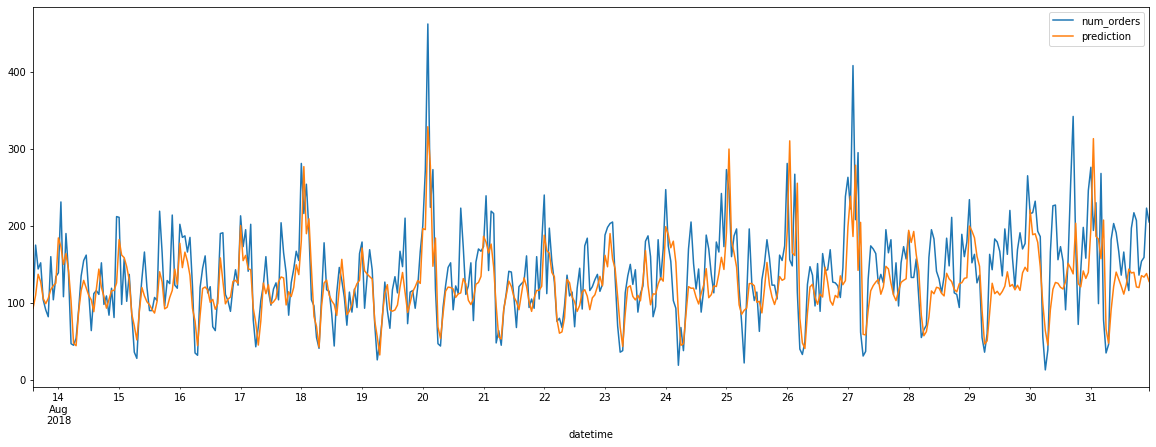

In [49]:
# Построение графика
target_test.plot(figsize=(20, 7))

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод** 

Согласно условию задания итоговое значение RMSE на тестовой выборке должно было быть не более 48, модель Случайный лес max_depth=13, n_est=51 показала результат, соответствующий условию: 46.42 < 48 
   
<div>

## Итоговый вывод

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод** 

Для подготовки прототипа модели машинного обучения для определения количества заказов в следующий час была проведена следующая работа:
    
1. Изучена и предобработана переданная на анализ выборка на 26496 строк, 2 столбца за период 6 месяцев с 01.03.2018 по 31.08.2018: 

 * проведены изменение типов данных, 
 * проведена проверка на дубли и адекватность данных,
 * установлена в качестве индекса колонка с датой, проверен хронологический порядок индексов,
 * проведено ресемплирование данных: суммирование 10-тиминутных интервалов в часы, итоговая выборка сократилась до 4416 строк и 1 столбца.

    
2. Проведен анализ данных и визуализация рядов на графиках за весь период и 1-15 марта, проанализированы тенденции и тренды с помощью скользящего среднего, структуры DecomposeResult и разностей временного ряда, определены тенденции на рост заказов в период июнь-август в рамках всего периода, а также выделены пики активности клиентов в рамках дня - часы 20-01.
3. Проведено обучение моделей и оценка качества предсказаний на обучающей выборке с помощью метрики RMSE, использованы константная модель, модель Линейной регрессии, Случайного леса и LGBM; наилучший результат RMSE=11.04 показала модель  Случайный лес max_depth=13, n_est=51. 
4. Проведена проверка модели Случайный лес max_depth=13, n_est=51 на тестовых данных, где она также показала приемлемые результаты: RMSE = 46.42, что удовлетворяет условию задачи.

Данная модель может быть рекомендована для дальнейшего использования для предсказания количества заказов такси. 
   
<div>